<h1>Mandatory Assignment 1 – Data Analysis and Preprocessing for a Small Real Estate Project- Elisabet</h1>

<h2>Task 1. Data Loading and Descriptive Statistics </h2>

<h3>1.1 Loading the Boston Housing dataset</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns   #Library to create a correlation matrix heatmap for your DataFrame.

df=pd.read_csv("HousingData.csv")

<h3>1.2 Display of the first few rows of the data</h3>

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


<h3>1.3 Basic information about the dataset (number of samples, variables and their types)</h3>

In [8]:
# Check the number of rows and columns in the dataset
print(f"The dataset contains {df.shape[0]} rows/samples and {df.shape[1]} columns/variables.")

The dataset contains 506 rows/samples and 14 columns/variables.


In [5]:
# Check for data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


<p>The dataset represents a two-dimensional array (DataFrame) with two numerical datatypes: mostly float (e.g., CRIM) and two int variables (RAD and TAX). There are the same number of missing values (20) in some variables (CRIM, ZN, INDUS, CHAS, AGE, and LSTAT).</p>

<h3>1.4 Descriptive Statistics: mean and standard deviation of columns</h3>

In [12]:
# Calculate mean and standard deviation
stats = pd.DataFrame({
    'Mean': df.mean(),
    'Standard Deviation': df.std()
})

# Print the result as a table
print(stats)

               Mean  Standard Deviation
CRIM       3.611874            8.720192
ZN        11.211934           23.388876
INDUS     11.083992            6.835896
CHAS       0.069959            0.255340
NOX        0.554695            0.115878
RM         6.284634            0.702617
AGE       68.518519           27.999513
DIS        3.795043            2.105710
RAD        9.549407            8.707259
TAX      408.237154          168.537116
PTRATIO   18.455534            2.164946
B        356.674032           91.294864
LSTAT     12.715432            7.155871
MEDV      22.532806            9.197104


<h3>Descriptive statistics: Explainaition of the ones I find most intriguing</h3>
<p> Here's what stands out:

CRIM (Per capita crime rate by town)
Mean: 3.61, Standard Deviation: 8.72  
This indicates that while the average crime rate is relatively low, the high standard deviation suggests significant variability. Some towns likely have much higher crime rates compared to others.

ZN (Proportion of residential land zoned for large lots (over 25,000 sq. ft.) Andel av boligområder regulert for store tomter (over 25 000 kvadratfot).
Mean: 11.21, Standard Deviation:23.39  
The large standard deviation relative to the mean suggests that most areas may have low zoning proportions, but there are a few areas with significantly high zoning proportions for large lots.

AGE (Proportion of owner-occupied units built before 1940)
Mean: 68.52, Standard Deviation: 27.99  
The high mean shows that most buildings are older, but the large variability indicates some areas have much newer buildings, leading to significant differences in age of the buildings.

TAX (Property tax rate per $10,000)
Mean: 408.23, Standard Deviation: 168.53  
The high standard deviation suggests that tax rates vary widely across regions.

LSTAT (Percentage of Lower Status Population)
Mean: 12.71, Standard Deviation: 7.16  
This shows moderate levels of low-income population across regions, with some areas experiencing much higher levels of lower status population.

To sum up: 
Variables like CRIM, ZN, and TAX demonstrate high variability, which could indicate the need for further investigation into factors influencing these disparities. 
On the other hand, NOX (Nitrogen oxide concentration) and CHAS (Proximity to Charles River) have small standard deviations, showing consistency across regions.</p>

<h2>2. Data Visualisation and Exploration</h2>

<h3>2.1 A correlation matrix heatmap and an analysis of my observations</h3>

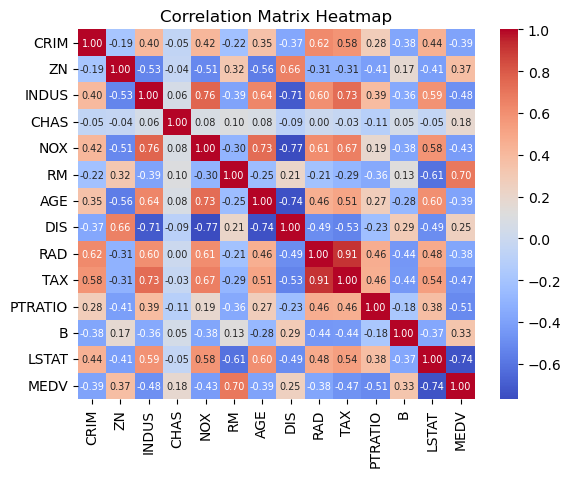

In [16]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create heatmap 
sns.heatmap(
    corr_matrix,
    annot=True,  # Display the correlation coefficients
    fmt=".2f",   # Format the numbers to 2 decimal places
    cmap='coolwarm',  # Set color map
    annot_kws={"size": 7}  # Reduce font size
)
    
# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

<h3>Analysis of heatmap:</h3>

<p>High Positive Correlations:</p>

<p>INDUS and NOX (0.76): Indicates that higher industrial activity is related with higher nitric oxide pollution.
TAX and RAD (0.91): Suggests areas with higher accessibility to radial highways also tend to have higher property tax rates.
RM and MEDV (0.70): Shows that the number of rooms is positively correlated with median home value, indicating homes with more rooms are more valuable.

<p>High Negative Correlations:</p>

<p>LSTAT and MEDV (-0.74): Indicates that neighborhoods with higher proportions of lower-status populations tend to have lower median home values.
NOX and DIS (-0.77): Suggests areas further from employment centers (DIS) have lower nitric oxide pollution (NOX).</p>

<h3>2.2 The top 3 variables most correlated with the median house value (MEDV) and why they might be important predictors of the house price</h3>

<p>The variable that is the most correlated with  house price (MEDV) is the percentage of lower status population (LSTAT) with a negative correlation of r= -0,74, meaning that a higher frequency of lower status populations in an area might indicate a lower house price in the same area. LSTAT reflects neighborhood wealth and social standing. It could mean that real estate markets tend to value properties in wealthier areas higher because of lower crime rates, better infrastructure, and a higher demand for homes in such neighborhoods. LSTAT serves as a proxy for these underlying conditions. </p>

<p>Another factor negatively related to the house prize is the pupil-teacher ratio (PTRATIO. This could indicate, however, not that strong (r=-0,51), indicating that a higher teacher density (or better schools) in a neighboorhood reflects a higher need for housing and therefore higher house prizes. </p> 
    
<p>On the other hand, the average number of rooms in a house or flat is a positive predictor (r=0,7) for the house price. The more rooms -or the property size- the higher the house prize, which makes sense. </p>

<h3>2.3 Histogram plots for all numerical features and analysis of skewness</h3>

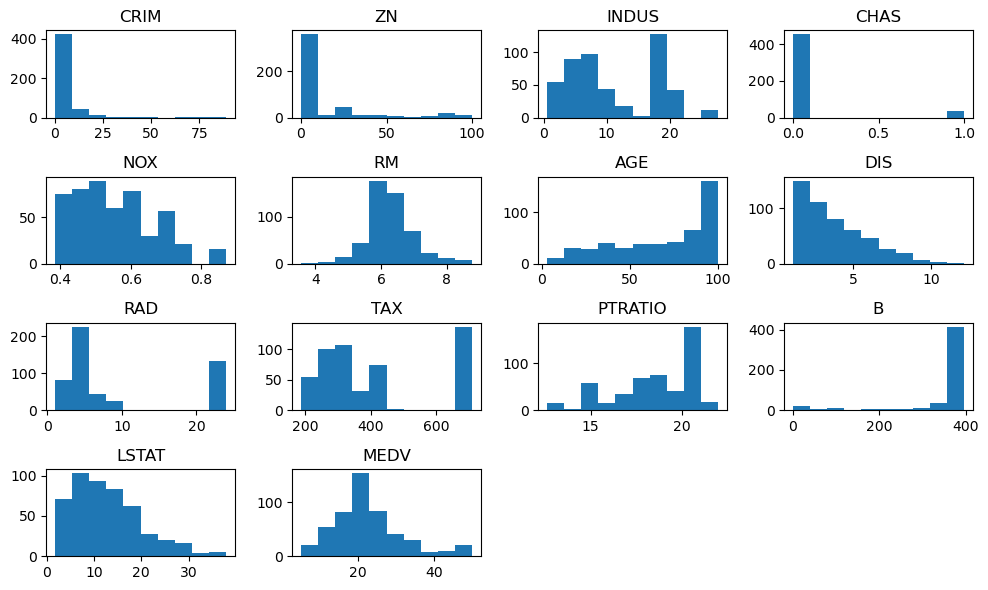

In [17]:
# Create histograms for all numerical columns
df.hist(bins=10, figsize=(10, 6), grid=False)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

<p>The distribution of data is not normal for most of the numerical variables. 
The distribution is skewed for several variables, such as CRIM, NOK, DIM, AGE, DIS, LSTAT and MEDV, which means you cannot draw meaningful conclutions or use statistical tests. The skewness and histograms lacking a bellshape form could be due to a too small dataset and/or the dataset is biased towards e.g. specific groups or data</p>
<p>RM is more or less the only variable that is normally distributet, which means that you can rely on statistical tests.</p>



<h2>3. Data Preprocessing</h2>

<h3>3.1 Check for missing values. How many are there?</h3>

In [26]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Beregne prosentandelen av missing values
percent_missing = df.isnull().sum() * 100 / len(df)

# Runder av prosentandelen til to desimaler
percent_missing = percent_missing.round(2)

# Lag en tabell
missing_value_df = pd.DataFrame({
    'Kolonne': df.columns,
    'Prosentandel_manglende_verdier': percent_missing
})

print(missing_value_df)

Missing values in each column:
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
         Kolonne  Prosentandel_manglende_verdier
CRIM        CRIM                            3.95
ZN            ZN                            3.95
INDUS      INDUS                            3.95
CHAS        CHAS                            3.95
NOX          NOX                            0.00
RM            RM                            0.00
AGE          AGE                            3.95
DIS          DIS                            0.00
RAD          RAD                            0.00
TAX          TAX                            0.00
PTRATIO  PTRATIO                            0.00
B              B                            0.00
LSTAT      LSTAT                            3.95
MEDV        MEDV                            0.00


<p>There are 20 missing values (3.95%) for 6 variables, in total 100 missing values in the dataset. </p>

<h3>3.2 Replace the missing values with the mean for numerical (int, float) variables and the mode for categorical (string, boolean) variables.</h3>

In [31]:
# Replace missing values with the mean of each column (in-place)
df.fillna(df.mean(), inplace=True)

In [30]:
# Check for data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


<p>Since it is only numerical variables in the dataframe, all missing values were replaced with the mean value of the variable. The table below shows that all missing variables have been replaced. </p>

<h2>4. Extract the MEDV variable from the DataFrame by moving it into a separate ndarray. </h2>

<h3>4.1 Split your DataFrame into X (DataFrame with all variables except for MEDV) and y (ndarray that contains only MEDV). </h3>

In [32]:
# Splitting the DataFrame
X = df.drop(columns=['MEDV'])  # All features except the target
y = df['MEDV'].to_numpy()      # Convert the target column to a NumPy ndarray

print("X (Features):")
print(X)
print("\ny (Target, as ndarray):")
print(y)

X (Features):
        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  68.518519  2.5050    1  273   

     PTRATIO       B      LSTAT  
0       15.3  3

<p>Explanation of the Code
df.drop(columns=['MEDV']):

This drops the column MEDV from the DataFrame df.
The resulting DataFrame, X, contains all the other columns.
df['MEDV'].to_numpy():

This selects the MEDV column from the DataFrame.
The .to_numpy() method converts the column into a NumPy ndarray.
Preservation of Data Types:

X remains a Pandas DataFrame, which is useful for further manipulation and analysis.
y becomes a NumPy ndarray, suitable for machine learning tasks where NumPy arrays are often required (e.g., scikit-learn).</p>

<h3>4.2 Use the reshape method to transform y (ndarray) into a two-dimensional array with many rows and one column (y should not be a simple one-dimensional ndarray).</h3>

In [34]:
# Reshaping y into a 2D array with one column
y_reshaped = y.reshape(-1, 1)

<h3>4.3 Print the shapes of X and y to confirm the splitting is done correctly.</h3>

In [36]:
#print the shape of X
print("X (Features):")
print(X)

#print the new shape of Y
print("\nReshaped y (2D array with one column):")
print(y_reshaped)

X (Features):
        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  68.518519  2.5050    1  273   

     PTRATIO       B      LSTAT  
0       15.3  3

<p>The shape of the dataframe is correct, with one less column (MEDV variable is extracted), and the y is reshaped into a 2D array with one column</p>

<h3>4.4 What do you think is the purpose of extracting the MEDV variable from the DataFrame into a separate ndarray?</h3>

<p>The separation of MEDV into a standalone ndarray is a fundamental step in preparing the dataset for machine learning or statistical analysis. It aligns the data structure with modeling frameworks, simplifies computations, and enhances both performance (speed up calculations) and interpretability. This practice is standard in predictive modeling workflows and reflects a clear and structured approach to dataset preparation.</p>